# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# # Define an empty list to fetch the weather data for each city
city_data = []

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tubarjal
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | viedma
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | albardon
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | willemstad
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | kulia village
City not found. Skipping...
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | glendive
Processing Record 19 of Set 1 | fort wellington
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | h

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tubarjal,30.4999,38.2160,25.93,37,35,1.53,SA,1731251026
1,edinburgh of the seven seas,-37.0676,-12.3116,15.81,87,100,10.68,SH,1731251027
2,viedma,-40.8135,-62.9967,17.01,28,100,2.54,AR,1731250977
3,stanley,54.8680,-1.6985,11.82,92,75,3.09,GB,1731251029
4,ribeira grande,38.5167,-28.7000,20.22,94,75,7.20,PT,1731251030


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

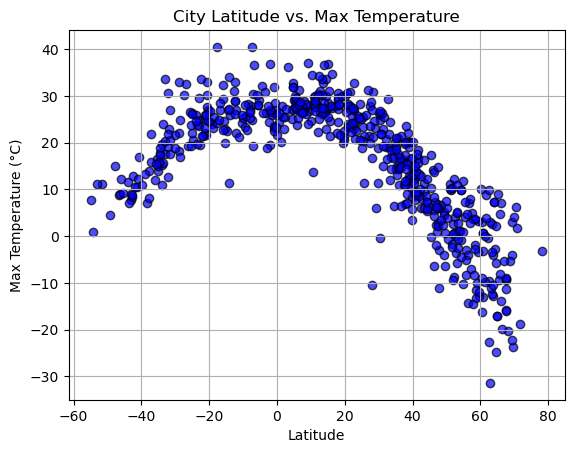

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

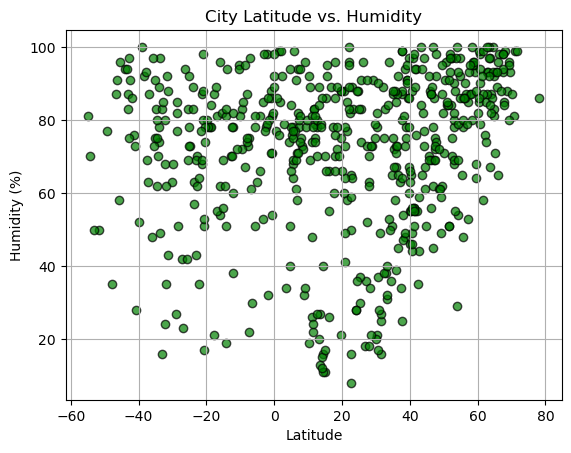

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="green", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

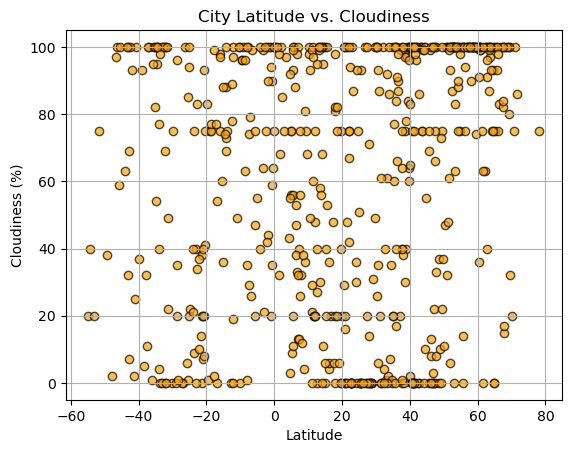

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="orange", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

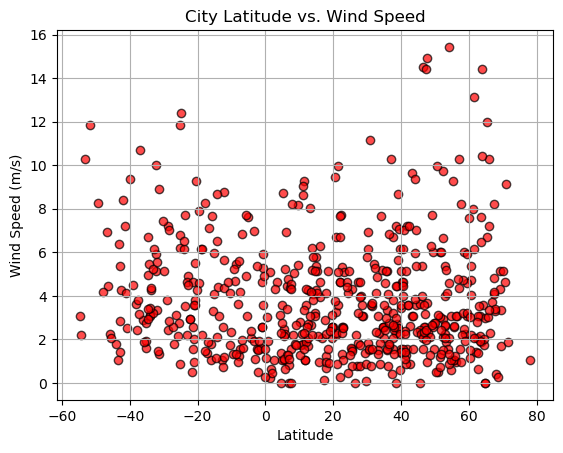

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="red", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:

# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, xlabel, ylabel, title, output_file):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot
    plt.scatter(x_data, y_data, color="blue", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, slope * x_data + intercept, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show the plot
    plt.show()


In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tubarjal,30.4999,38.2160,25.93,37,35,1.53,SA,1731251026
3,stanley,54.8680,-1.6985,11.82,92,75,3.09,GB,1731251029
4,ribeira grande,38.5167,-28.7000,20.22,94,75,7.20,PT,1731251030
7,prince rupert,54.3161,-130.3201,9.83,54,100,15.43,CA,1731250862
8,st. john's,47.5649,-52.7093,2.76,75,100,14.92,CA,1731251034


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,15.81,87,100,10.68,SH,1731251027
2,viedma,-40.8135,-62.9967,17.01,28,100,2.54,AR,1731250977
5,waitangi,-43.9535,-176.5597,11.57,94,63,1.79,NZ,1731251031
6,albardon,-31.4372,-68.5256,26.88,43,22,8.92,AR,1731250862
9,port-aux-francais,-49.3500,70.2167,4.52,77,38,8.28,TF,1731251035


###  Temperature vs. Latitude Linear Regression Plot

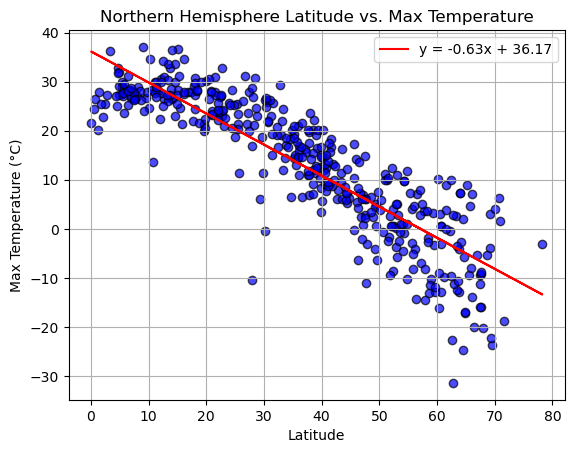

In [58]:
# Linear regression on Northern Hemisphere (Latitude vs. Max Temperature)
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Northern Hemisphere Latitude vs. Max Temperature", 
    "output_data/Northern_Hemisphere_Lat_vs_Temperature_Regression.png"
)


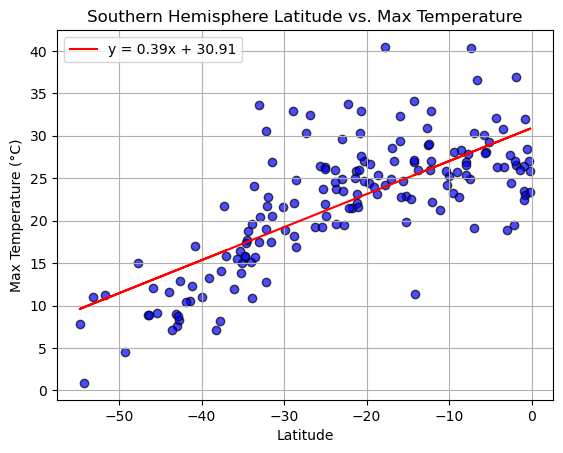

In [59]:
# Linear regression on Southern Hemisphere (Latitude vs. Max Temperature)
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Southern Hemisphere Latitude vs. Max Temperature", 
    "output_data/Southern_Hemisphere_Lat_vs_Temperature_Regression.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

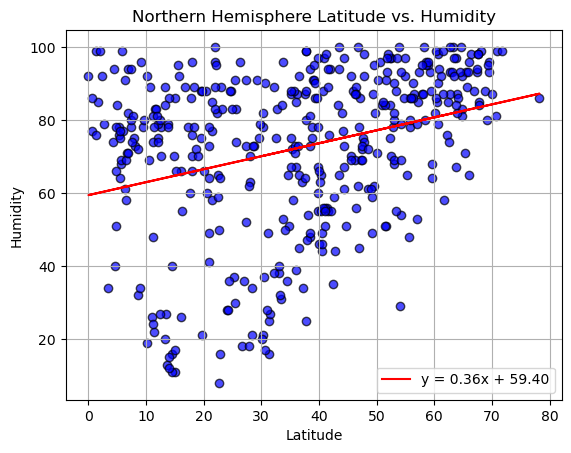

In [60]:
# Build scatter plot for latitude vs. humidity in the Northern Hemisphere
# Linear regression on Northern Hemisphere (Latitude vs. Humidity)
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity", 
    "Northern Hemisphere Latitude vs. Humidity", 
    "output_data/Northern_Hemisphere_Lat_vs_Humidity_Regression.png"
)


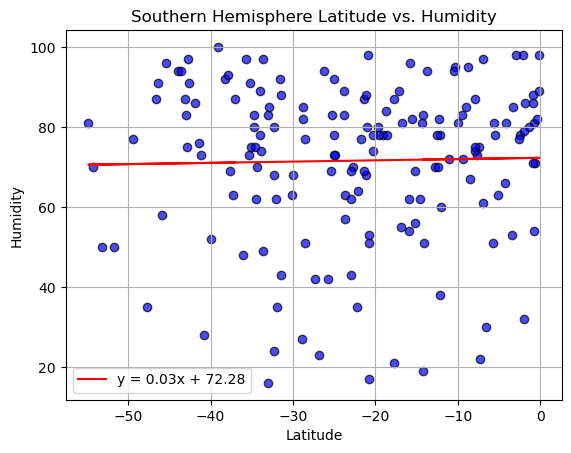

In [61]:

# Build scatter plot for latitude vs. humidity in the Southern Hemisphere
# Linear regression on Northern Hemisphere (Latitude vs. Humidity)
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity", 
    "Southern Hemisphere Latitude vs. Humidity", 
    "output_data/Southern_Hemisphere_Lat_vs_Humidity_Regression.png"
)



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

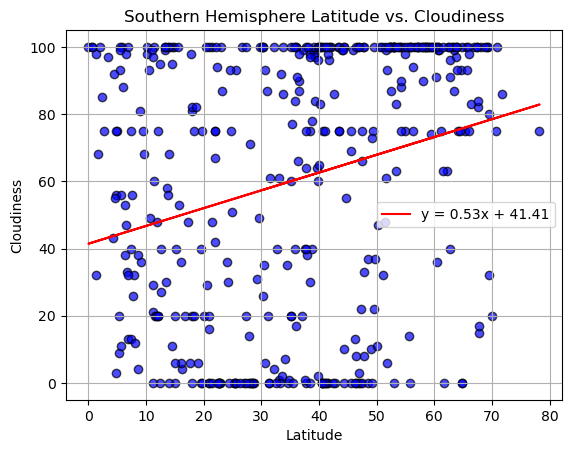

In [62]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness", 
    "Southern Hemisphere Latitude vs. Cloudiness", 
    "output_data/Southern_Hemisphere_Lat_vs_Cloudiness_Regression.png"
)


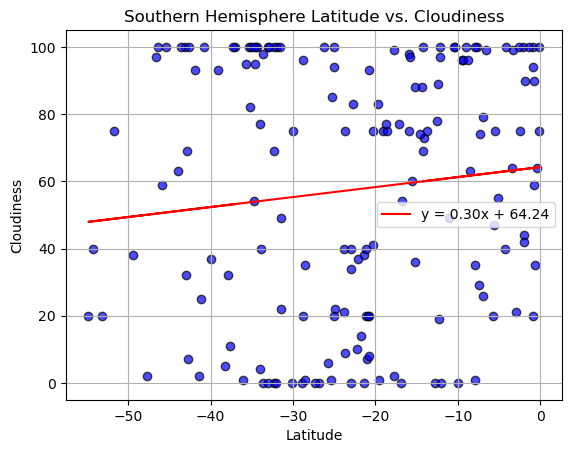

In [63]:
#;;''qgcx Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness", 
    "Southern Hemisphere Latitude vs. Cloudiness", 
    "output_data/Southern_Hemisphere_Lat_vs_Cloudiness_Regression.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

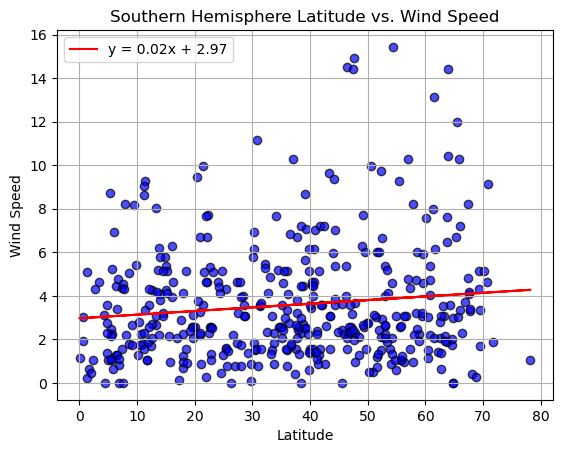

In [64]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. Wind Speed
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed", 
    "Southern Hemisphere Latitude vs. Wind Speed", 
    "output_data/Southern_Hemisphere_Lat_vs_Wind Speed_Regression.png"
)

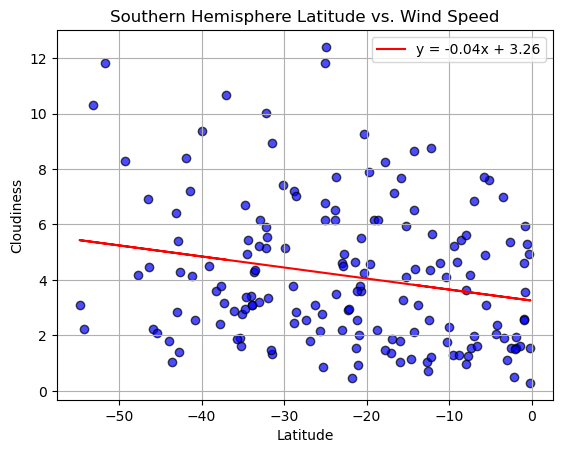

In [65]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Cloudiness", 
    "Southern Hemisphere Latitude vs. Wind Speed", 
    "output_data/Southern_Hemisphere_Lat_vs_Wind Speed_Regression.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE